<h1>Carbon Emissions Dataset</h1>

In [2]:
#load ghg dataset
carbon_df = pd.read_csv('PDGES-GHGRP-GHGEmissionsGES-2004-Present (1).csv', encoding='latin-1')
carbon_df.head()

,GHGRP ID / Numéro d'identification de PDGES,Reference Year / Année de référence,Facility Name / Nom de l'installation,Facility Location / Emplacement de l'installation,Facility City or District or Municipality / Ville ou District ou Municipalité de l'installation,Facility Province or Territory / Province ou territoire de l'installation,Facility Postal Code / Code postal de l'installation,Latitude,Longitude,Facility NPRI ID / Numéro d'identification de l'INRP,...,C4F8 (tonnes),C4F8 (tonnes CO2e / tonnes éq. CO2),C5F12 (tonnes),C5F12 (tonnes CO2e / tonnes éq. CO2),C6F14 (tonnes),C6F14 (tonnes CO2e / tonnes éq. CO2),PFC Total (tonnes CO2e / tonnes éq. CO2),SF6 (tonnes),SF6 (tonnes CO2e / tonnes éq. CO2),Total Emissions (tonnes CO2e) / Émissions totales (tonnes éq. CO2)
0,G10001,2020,Division Alma,1100 Melanion Street,Alma,Quebec,G8B 5W2,48.56500,-71.65556,983.0,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,7.779969e+04
1,G10003,2020,"Foothills Pipeline, Alberta",NaN,Airdrie,Alberta,T4A 2G7,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,2.878482e+05
2,G10004,2020,Kingston CoGen,5146 Taylor-Kidd Boulevard,Bath,Ontario,K0H 1G0,44.20950,-76.72460,5765.0,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,3.237168e+02
3,G10006,2020,Redwater Fertilizer Operations,56225 SH643,Sturgeon County,Alberta,T0A 2W0,53.84200,-113.09300,2134.0,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,1.091022e+06
4,G10007,2020,Alberta Envirofuels,9511 17 Street Northwest,Edmonton,Alberta,T6P 1Y3,53.53199,-113.36492,3974.0,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,3.016439e+05


In [3]:
#get summarized info
carbon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13093 entries, 0 to 13092
Data columns (total 77 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                           --------------  -----  
 0   GHGRP ID / Numéro d'identification de PDGES                                                                                      13093 non-null  object 
 1   Reference Year / Année de référence                                                                                              13093 non-null  int64  
 2   Facility Name / Nom de l'installation                                                                                            13093 non-null  object 
 3   Facility Location / Emplacement de l'installation                                               

In [4]:
#only take years from 2014 to 2019 (inclusive)
carbon_df = carbon_df[(carbon_df['Reference Year / Année de référence'] >= 2015) & (carbon_df['Reference Year / Année de référence'] <= 2019)]

In [5]:
#select relevant columns
carbon_df = carbon_df.iloc[:,[1,5,26]]
carbon_df.head()

,Reference Year / Année de référence,Facility Province or Territory / Province ou territoire de l'installation,CO2 (tonnes)
1703,2019,Quebec,7.143435e+04
1704,2019,Alberta,3.740449e+05
1705,2019,Ontario,9.745530e+02
1706,2019,Alberta,1.143131e+06
1707,2019,Alberta,2.648890e+05


In [6]:
#rename columns for ease
carbon_df = carbon_df.rename(columns={"Reference Year / Année de référence": "year",
                                     "Facility Province or Territory / Province ou territoire de l'installation": "province",
                                     "CO2 (tonnes)": "co2_tonnes"})
carbon_df.head()

,year,province,co2_tonnes
1703,2019,Quebec,7.143435e+04
1704,2019,Alberta,3.740449e+05
1705,2019,Ontario,9.745530e+02
1706,2019,Alberta,1.143131e+06
1707,2019,Alberta,2.648890e+05


In [7]:
#fill in which federal party ruled each province in different years
carbon_df["federal_party"] = ["a"]*len(carbon_df.year)

carbon_df.loc[carbon_df.province == "Alberta", "federal_party"] = "Conservative"

carbon_df.loc[carbon_df.province == "Ontario", "federal_party"] = "Liberal"

carbon_df.loc[(carbon_df.province == "Quebec") & (carbon_df.year >= 2015), "federal_party"] = "Liberal"
carbon_df.loc[(carbon_df.province == "Quebec") & (carbon_df.year == 2019), "federal_party"] = "Bloc"

carbon_df.loc[carbon_df.province == "British Columbia", "federal_party"] = "Liberal"

carbon_df.loc[(carbon_df.province == "New Brunswick") & (carbon_df.year >= 2015), "federal_party"] = "Liberal"
carbon_df.loc[(carbon_df.province == "New Brunswick") & (carbon_df.year == 2019), "federal_party"] = "Conservative"

carbon_df.loc[carbon_df.province == "Saskatchewan", "federal_party"] = "Conservative"

carbon_df.loc[carbon_df.province == "Manitoba", "federal_party"] = "Conservative"

carbon_df.loc[carbon_df.province == "Nova Scotia", "federal_party"] = "Liberal"

carbon_df.loc[carbon_df.province == "Newfoundland and Labrador", "federal_party"] = "Liberal"

carbon_df.loc[carbon_df.province == "Prince Edward Island", "federal_party"] = "Liberal"

carbon_df.loc[carbon_df.province == "Yukon", "federal_party"] = "Liberal"

carbon_df.loc[carbon_df.province == "Northwest Territories", "federal_party"] = "Liberal"

carbon_df.loc[carbon_df.province == "Nunavut", "federal_party"] = "NDP"

carbon_df.head()

,year,province,co2_tonnes,federal_party
1703,2019,Quebec,7.143435e+04,Bloc
1704,2019,Alberta,3.740449e+05,Conservative
1705,2019,Ontario,9.745530e+02,Liberal
1706,2019,Alberta,1.143131e+06,Conservative
1707,2019,Alberta,2.648890e+05,Conservative


In [8]:
#group emissions by year, province and party
grouped = carbon_df.groupby(['year', 'province', 'federal_party']).sum()
new_carbon_df = grouped.reset_index() #turn index into columns
new_carbon_df.head()

,year,province,federal_party,co2_tonnes
0,2015,Alberta,Conservative,1.360464e+08
1,2015,British Columbia,Liberal,1.191452e+07
2,2015,Manitoba,Conservative,1.490384e+06
3,2015,New Brunswick,Liberal,7.146915e+06
4,2015,Newfoundland and Labrador,Liberal,4.673263e+06


Text(0.5, 1.0, 'Annual CO2 Emissions for Canada (2015-2019)')

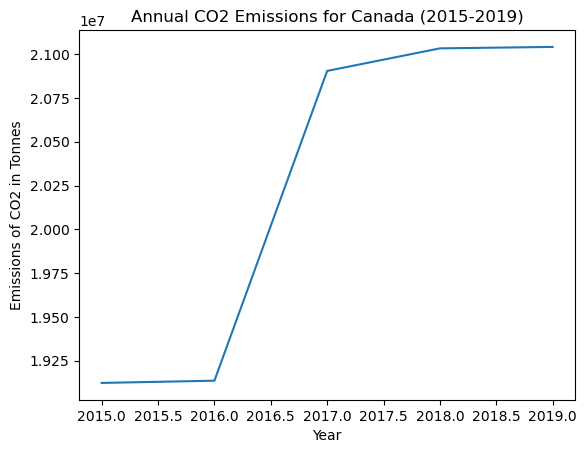

In [9]:
#plot emissions vs year
sns.lineplot(data=new_carbon_df, x='year', y='co2_tonnes', errorbar=None)
plt.ylabel("Emissions of CO2 in Tonnes")
plt.xlabel("Year")
plt.title('Annual CO2 Emissions for Canada (2015-2019)')

Looking at the plot above, we can see that CO2 emissions in Canada drastically increased from 2016 to 2017, but have otherwise remained stable.

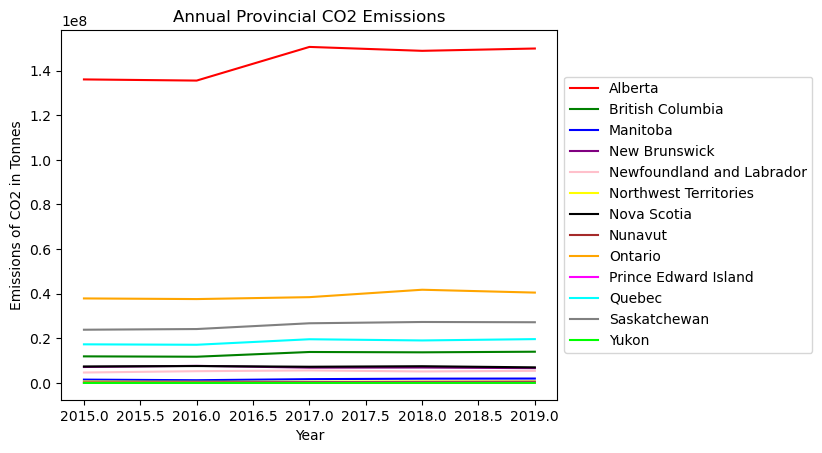

In [10]:
#define a distinctive color palette
province_palette = ('red', 'green', 'blue', 'purple', 'pink', 'yellow', 'black', 'brown', 'orange', 'magenta', 'cyan', 'grey', 'lime')

#plot provincial emissions vs year
sns.lineplot(data=new_carbon_df, x='year', y='co2_tonnes', hue='province', palette=province_palette)
plt.ylabel("Emissions of CO2 in Tonnes")
plt.xlabel("Year")
plt.title('Annual Provincial CO2 Emissions')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

From the above plot, we can see that from 2015 to 2019, Alberta has consistently been the largest producer of CO2 emissions. This makes sense, as Alberta's economy is primarily driven by oil exports. After that, the order seems to be Ontario, Saskatchewan, Quebec and B.C. as the top 5. Alberta produces significantly more CO2 than Ontario in second place; about a metric tonne more every year.

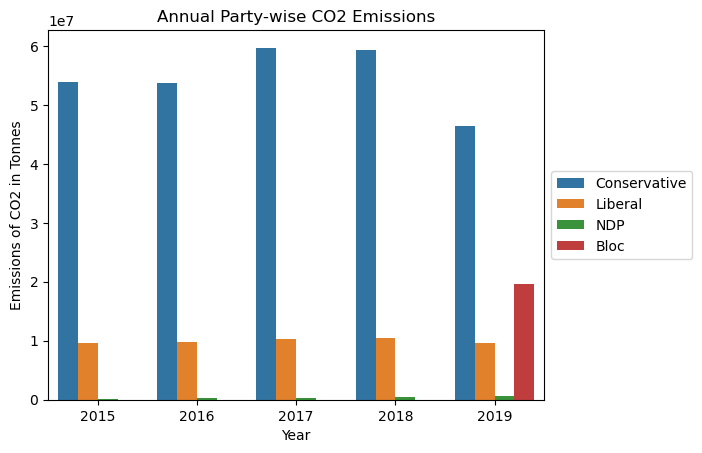

In [11]:
#plot party-qise emissions vs year
sns.barplot(data=new_carbon_df, x='year', y='co2_tonnes', hue='federal_party', errorbar=None)
plt.ylabel("Emissions of CO2 in Tonnes")
plt.xlabel("Year")
plt.title('Annual Party-wise CO2 Emissions')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

From the above plot, we can see that for all 5 years, Conservative provinces consistently produced more CO2 emissions than other parties. This is likely due to Alberta and Saskatchewan both being Conservative provinces, while also both being in the top 5 CO2-producing provinces.

<h1>Parliament Dataset</h1>

In [12]:
df = pd.read_csv('comb_parl.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152522 entries, 0 to 152521
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       152522 non-null  int64  
 1   basepk           152522 non-null  int64  
 2   hid              152522 non-null  object 
 3   speechdate       152522 non-null  object 
 4   pid              138480 non-null  object 
 5   opid             138268 non-null  float64
 6   speakeroldname   138261 non-null  object 
 7   speakerposition  18968 non-null   object 
 8   maintopic        151339 non-null  object 
 9   subtopic         151556 non-null  object 
 10  subsubtopic      41939 non-null   object 
 11  speechtext       152522 non-null  object 
 12  speakerparty     138268 non-null  object 
 13  speakerriding    138268 non-null  object 
 14  speakername      147545 non-null  object 
 15  speakerurl       132642 non-null  object 
dtypes: float64(1), int64(2), object(13)
me

In [14]:
#get rows talking about carbon tax
df_carbon = df.loc[df.speechtext.str.lower().str.contains('carbon tax'),:]
df_carbon.shape

(2611, 16)

We have ~2000 observations to work with, which is pretty good.

In [15]:
#look for rows that talk about harming Canadians
filter_ = df_carbon.speechtext.str.extract(r'((tax)(.)*(harm|cost|jeopardize|hurt|pay)(.)*Canadian)').dropna()
filter_.shape

(510, 5)

We know from the earlier regex filtering that all of our observations contain the term 'carbon tax'. If we search for sections with 'tax harm Canadian' (including synonyms for harm) then we will be able to find observations that more likely than not talk about the carbon tax hurting Canadians in some way. Above, we see that there are 510 such observations compared to the total 2611. This has essentially split our dataset into a 80:20 ratio of for to against the carbon tax. While that's not too bad, a 50:50 split would have been ideal, since we would know the data is in no way skewed. However, that can be easily fixed by sampling from the 'for' set. Altogether, we'll have ~1000 observations, which is reasonable for modelling purposes.

In [16]:
#split the sets
df_against_tax = df_carbon.loc[df_carbon.index.isin(filter_.index), :]
df_for_tax = df_carbon.loc[~df_carbon.index.isin(filter_.index), :]

#add a 'sentiment' column; this will help us identify whether the text is speaking for or against the carbon tax
df_against_tax.loc[:, 'Sentiment'] = 'Negative'
df_for_tax.loc[:, 'Sentiment'] = 'Positive'

C:\Users\ehraa\AppData\Local\Temp\ipykernel_23136\1055247102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_against_tax.loc[:, 'Sentiment'] = 'Negative'
C:\Users\ehraa\AppData\Local\Temp\ipykernel_23136\1055247102.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_tax.loc[:, 'Sentiment'] = 'Positive'


In [17]:
#sample from 'for' set
df_for_tax = df_for_tax.sample(filter_.shape[0], random_state=0)

#combine the 2 sets
df = pd.concat([df_against_tax, df_for_tax], axis=0)
df.shape

(1020, 17)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 2738 to 107560
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1020 non-null   int64  
 1   basepk           1020 non-null   int64  
 2   hid              1020 non-null   object 
 3   speechdate       1020 non-null   object 
 4   pid              1017 non-null   object 
 5   opid             1016 non-null   float64
 6   speakeroldname   1016 non-null   object 
 7   speakerposition  9 non-null      object 
 8   maintopic        1015 non-null   object 
 9   subtopic         1015 non-null   object 
 10  subsubtopic      306 non-null    object 
 11  speechtext       1020 non-null   object 
 12  speakerparty     1016 non-null   object 
 13  speakerriding    1016 non-null   object 
 14  speakername      1020 non-null   object 
 15  speakerurl       1006 non-null   object 
 16  Sentiment        1020 non-null   object 
dtypes: float64(1),

In [19]:
#only keep useful columns
df = df.iloc[:, [3,12,13,16]]
df.head()

,speechdate,speakerparty,speakerriding,Sentiment
2738,2015-12-08,Conservative,Dauphin--Swan River--Neepawa,Negative
4878,2015-02-20,Conservative,Oak Ridges--Markham,Negative
5056,2015-02-23,Conservative,Moncton--Riverview--Dieppe,Negative
5667,2015-02-25,Conservative,Burlington,Negative
5669,2015-02-25,Conservative,Calgary Centre,Negative


In [20]:
df.isna().sum()

speechdate       0
speakerparty     4
speakerriding    4
Sentiment        0
dtype: int64

In [21]:
#drop remaining NAs
df.dropna(inplace=True)

Further, let's split up the dates into different columns for future ease.

In [22]:
dates_split = df.speechdate.str.extract(r'((\d\d\d\d)-(\d\d)-(\d\d))')
df['Year'] = dates_split.iloc[:, 1]

df.head()

,speechdate,speakerparty,speakerriding,Sentiment,Year
2738,2015-12-08,Conservative,Dauphin--Swan River--Neepawa,Negative,2015
4878,2015-02-20,Conservative,Oak Ridges--Markham,Negative,2015
5056,2015-02-23,Conservative,Moncton--Riverview--Dieppe,Negative,2015
5667,2015-02-25,Conservative,Burlington,Negative,2015
5669,2015-02-25,Conservative,Calgary Centre,Negative,2015


In [23]:
#drop speechdate column as we don't need it anymore
df.drop('speechdate', axis=1, inplace=True)

In [24]:
#make sure there are no erroneus entries
print(df.speakerparty.unique())
print(df.Year.unique())
len(df.speakerriding.unique())

['Conservative' 'New Democratic Party' 'Liberal' 'Independent'
 'Bloc Québécois' 'Green Party' 'NDP']
['2015' '2016' '2017' '2018' '2019']


161

In [25]:
#fix NDP and Bloc splits
df.loc[df.speakerparty=='New Democratic Party', 'speakerparty'] = 'NDP'
df.loc[df.speakerparty=='Bloc Québécois', 'speakerparty'] = 'Bloc'

#turn year into integer variables
df.Year = df.Year.apply(lambda x: int(x))

Now, time to visualize.

Text(0, 0.5, 'Count')

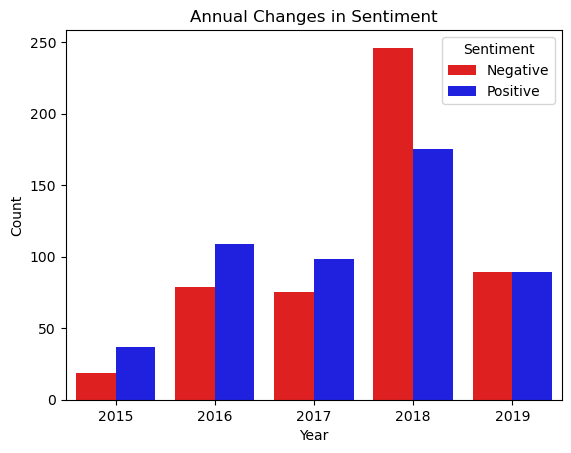

In [26]:
#plot sentiments vs years
sns.countplot(data=df, x='Year', hue='Sentiment', palette=['red', 'blue'])
plt.title("Annual Changes in Sentiment")
plt.xlabel("Year")
plt.ylabel("Count")

Looks like in 2015, 2016 and 2017, there was a more positive sentiment, while in 2018 there was a more negative sentiment about carbon tax. In 2019, it seems to be about equal. Unfortunately, since there are a different number of observations for each year, we can't directly compare annual changes in sentiment.

<Axes: xlabel='speakerparty', ylabel='count'>

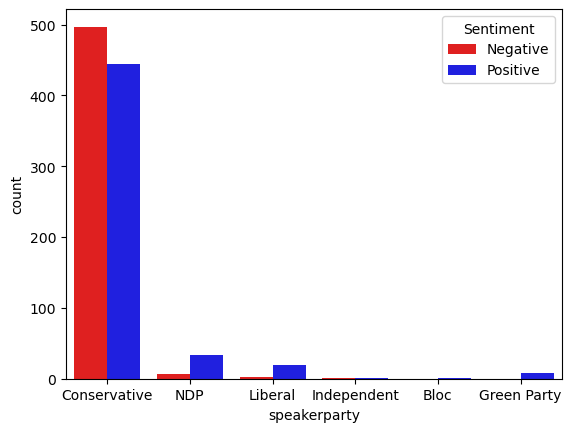

In [27]:
#plot sentimant and party
sns.countplot(data=df, x='speakerparty', hue='Sentiment', palette=['red', 'blue'])

Conservatives seems to have been speaking largely against the tax, while the NDP, Liberal and Green Party members seem to be speaking mostly for. The data shows that Conservatives also seem to be talking about the carbon tax a lot more, although that could simply be due to the sampling.

<h1>Joining Datasets</h1>

Now, let's join the 2 datasets. We need something to join them on, so I'm going to use the riding as an indicator of province.

In [28]:
ridings = gpd.read_file('2015_ridings/FED_CA_2_2_ENG.shp')
ridings.head()

,FED_NUM,NID,FEDNUM,ENNAME,FRNAME,PROVCODE,CREADT,REVDT,REPORDER,DECPOPCNT,QUIPOPCNT,ENLEGALDSC,FRLEGALDSC,geometry
0,35029,{30F68311-B8D1-4049-9DA1-88F80222930F},35029,Etobicoke North,Etobicoke-Nord,ON,20131005,None,2013,117601,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((7201954.777 935407.037, 7202067.746 ..."
1,35032,{39AFA153-47AC-4203-87DE-B7A71DF234E9},35032,Guelph,Guelph,ON,20131005,None,2013,121688,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((7151948.911 899971.331, 7151447.129 ..."
2,48017,{C3BC533E-6642-4C06-9291-10C0907A24A6},48017,Edmonton Mill Woods,Edmonton Mill Woods,AB,20131005,None,2013,106103,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((4811379.686 2157147.634, 4811380.094..."
3,48018,{C5BCB32E-57F6-4448-A533-33D114D02386},48018,Edmonton Riverbend,Edmonton Riverbend,AB,20131005,None,2013,106302,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((4801564.891 2159173.746, 4801137.980..."
4,48021,{BBFBC678-2943-48FD-BC75-A259C0060A06},48021,Edmonton--Wetaskiwin,Edmonton--Wetaskiwin,AB,20131005,None,2013,110644,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((4694436.409 2130675.640, 4694437.989..."


In [29]:
#normalize the ridings columns in both datasets
def normalize(x):
    x = x.lower()
    new = ''
    for c in x:
        if ord(c) >= 97 and ord(c) <= 122:
            new += c
    return new

In [30]:
ridings.ENNAME = ridings.ENNAME.apply(normalize)
df.speakerriding = df.speakerriding.apply(normalize)

In [31]:
#change province column in ridings dataset to full name of provinces
def transform(x):
    key = {'ON': 'Ontario', 'AB': 'Alberta', 'QC': 'Quebec', 'YT': 'Yukon', 'NU': 'Nunavut', 'NT': 'Northwest Territories',
           'SK': 'Saskatchewan', 'BC': 'British Columbia', 'MB': 'Manitoba', 'PE': 'Prince Edward Island',
           'NL': 'Newfoundland and Labrador', 'NS': 'Nova Scotia', 'NB': 'New Brunswick'}
    return key[x]

ridings.PROVCODE = ridings.PROVCODE.apply(transform)

In [43]:
#merge the datasets
df_prov = df.merge(ridings, left_on='speakerriding', right_on='ENNAME', how='inner')
df_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   speakerparty   1016 non-null   object  
 1   speakerriding  1016 non-null   object  
 2   Sentiment      1016 non-null   object  
 3   Year           1016 non-null   int64   
 4   FED_NUM        1016 non-null   int64   
 5   NID            1016 non-null   object  
 6   FEDNUM         1016 non-null   int64   
 7   ENNAME         1016 non-null   object  
 8   FRNAME         1016 non-null   object  
 9   PROVCODE       1016 non-null   object  
 10  CREADT         1016 non-null   object  
 11  REVDT          177 non-null    object  
 12  REPORDER       1016 non-null   object  
 13  DECPOPCNT      1016 non-null   int64   
 14  QUIPOPCNT      1016 non-null   int64   
 15  ENLEGALDSC     1016 non-null   object  
 16  FRLEGALDSC     1016 non-null   object  
 17  geometry       1016 non-null   ge

In [44]:
#only keep relevant columns
df_prov = df_prov.iloc[:, [0,2,3,9]]
df_prov.isna().sum()

speakerparty    0
Sentiment       0
Year            0
PROVCODE        0
dtype: int64

In [45]:
df_prov.shape

(1016, 4)

In [46]:
df_prov.rename(columns={'federal_party': 'speakerparty', 'year': 'Year', 'province': 'PROVCODE'}, inplace=True)
df_prov.head()

,speakerparty,Sentiment,Year,PROVCODE
0,Conservative,Negative,2015,Manitoba
1,Conservative,Negative,2018,Manitoba
2,Conservative,Positive,2016,Manitoba
3,Conservative,Positive,2018,Manitoba
4,Conservative,Positive,2018,Manitoba


In [47]:
df_joined = df_prov.merge(new_carbon_df, left_on=['Year', 'PROVCODE'], right_on=['year', 'province'], how='outer')
df_joined.head()

,speakerparty,Sentiment,Year,PROVCODE,year,province,federal_party,co2_tonnes
0,Conservative,Negative,2015.0,Manitoba,2015,Manitoba,Conservative,1.490384e+06
1,Conservative,Positive,2015.0,Manitoba,2015,Manitoba,Conservative,1.490384e+06
2,Conservative,Negative,2018.0,Manitoba,2018,Manitoba,Conservative,1.919020e+06
3,Conservative,Positive,2018.0,Manitoba,2018,Manitoba,Conservative,1.919020e+06
4,Conservative,Positive,2018.0,Manitoba,2018,Manitoba,Conservative,1.919020e+06


In [48]:
df_joined.isna().sum()

speakerparty     33
Sentiment        33
Year             33
PROVCODE         33
year              0
province          0
federal_party     0
co2_tonnes        0
dtype: int64

The nulls arise from the fact that not all provinces had members making statements about the carbon tax in certain years, which is fine. However, since we want to investigate the relationship between the province's sentiment and its emissions, the null entries don't give us any additional value. Also, there are only 33 rows with null values, so simply dropping them shouldn't be too big of a problem.

In [54]:
df_joined.dropna(inplace=True)
df_joined.shape

(1016, 8)

In [55]:
df_joined = df_joined.iloc[:, [0,1,4,5,6,7]]
df_joined.head()

,speakerparty,Sentiment,year,province,federal_party,co2_tonnes
0,Conservative,Negative,2015,Manitoba,Conservative,1.490384e+06
1,Conservative,Positive,2015,Manitoba,Conservative,1.490384e+06
2,Conservative,Negative,2018,Manitoba,Conservative,1.919020e+06
3,Conservative,Positive,2018,Manitoba,Conservative,1.919020e+06
4,Conservative,Positive,2018,Manitoba,Conservative,1.919020e+06


(array([428.,   0.,   0., 560.,   0.,   0.,  25.,   0.,   0.,   3.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

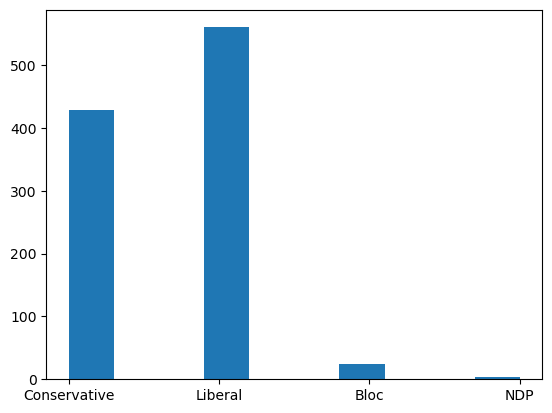

In [3]:
plt.hist(df_joined.federal_party)

Now, time to visualize.

<Axes: xlabel='count', ylabel='province'>

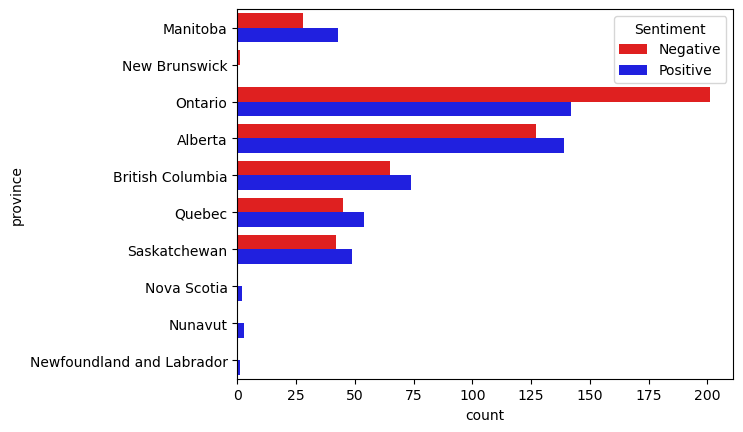

In [56]:
#plot provincial sentiments
sns.countplot(data=df_joined, y='province', hue='Sentiment', palette=['red', 'blue'])

Looks like Ontario is the only province with negative sentiment; all the other provinces seem to have overall positive sentiment about the carbon tax.

<Axes: xlabel='federal_party', ylabel='count'>

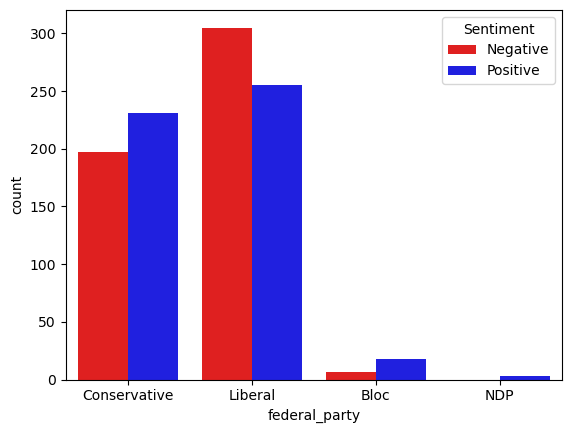

In [58]:
#plot party-wise sentiment
sns.countplot(data=df_joined, x='federal_party', hue='Sentiment', palette=['red', 'blue'])

<h1>Modeling</h1>

In [4]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# Replace this with your actual DataFrame
# For demonstration purposes, I'm creating a sample DataFrame
data = {
    'speaker_party': ['A', 'B', 'A', 'B', 'A', 'B'],
    'province_party': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
    'year': [2020, 2020, 2020, 2021, 2021, 2021],
    'province': ['P1', 'P1', 'P2', 'P2', 'P1', 'P1'],
    'sentiment': ['positive', 'negative', 'positive', 'positive', 'negative', 'negative'],
    'co2_emissions': [100, 120, 80, 90, 110, 95]
}

df = pd.DataFrame(data)

# Convert sentiment to binary (1 for positive, 0 for negative)
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Group by year, province, and province party, and calculate sentiment ratio
result_df = df.groupby(['year', 'province', 'province_party']).agg(
    co2_emissions=('co2_emissions', 'mean'),
    sentiment_ratio=('sentiment', 'mean')
).reset_index()

# Display the result
print(result_df)


   year province province_party  co2_emissions  sentiment_ratio
0  2020       P1              X          100.0              1.0
1  2020       P1              Y          120.0              0.0
2  2020       P2              X           80.0              1.0
3  2021       P1              X          110.0              0.0
4  2021       P1              Y           95.0              0.0
5  2021       P2              Y           90.0              1.0


In [25]:
import pandas as pd
import statsmodels.api as sm

# Replace "your_dataframe" with the actual name of your DataFrame
df = df_joined.copy()

# Check if 'federal_party' column exists in the DataFrame
if 'federal_party' in df.columns:
    df['federal_party'] = df['federal_party'].astype(str)  # Convert to string if it's boolean
    df = pd.get_dummies(df, columns=['province', 'federal_party'], drop_first=True)
    df = df.dropna()  # Drop rows with missing values

    # Check if the desired columns exist
    desired_columns = ['year', 'sentiment_ratio', 'province_P2', 'province_P3', 'federal_party_Y', 'co2_tonnes']
    existing_columns = [col for col in desired_columns if col in df.columns]

    if existing_columns:
        # Feature Engineering
        X = df[existing_columns]

        # Add a constant term to the independent variables
        X = sm.add_constant(X)

        # Separate target variable 'co2_tonnes'
        y = X['co2_tonnes']
        X = X.drop(columns=['co2_tonnes'])

        # Model Building
        model = sm.OLS(y, X).fit()

        # Model Evaluation
        print(model.summary())
    else:
        print("Desired columns not found in the DataFrame.")
else:
    print("'federal_party' column not found in the DataFrame.")


                            OLS Regression Results                            
Dep. Variable:             co2_tonnes   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.295
Date:                Mon, 26 Feb 2024   Prob (F-statistic):              0.255
Time:                        18:21:31   Log-Likelihood:                -19530.
No. Observations:                1016   AIC:                         3.906e+04
Df Residuals:                    1014   BIC:                         3.907e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.515e+09   3.14e+09     -1.119      0.2

In [26]:
import pandas as pd

# Assuming you have 'positive_sentiment' and 'negative_sentiment' columns representing sentiment
# Adjust column names accordingly if they are different in your DataFrame
positive_sentiment = (df_joined['sentiment'] == 'positive').astype(int)
negative_sentiment = (df_joined['sentiment'] == 'negative').astype(int)

# Add positive and negative sentiment columns to the DataFrame
df_joined['count_positive'] = positive_sentiment
df_joined['count_negative'] = negative_sentiment

# Group by 'year', 'province', and 'federal_party' and calculate sentiment ratio
grouped_df = df_joined.groupby(['year', 'province', 'federal_party']).agg(
    count_positive=pd.NamedAgg(column='count_positive', aggfunc='sum'),
    count_negative=pd.NamedAgg(column='count_negative', aggfunc='sum')
).reset_index()

# Calculate sentiment ratio
grouped_df['sentiment_ratio'] = grouped_df['count_positive'] / grouped_df['count_negative']

# Display the resulting DataFrame
print(grouped_df)


KeyError: 'sentiment'

In [27]:
import pandas as pd

# Assuming you have 'positive_sentiment' and 'negative_sentiment' columns representing sentiment
# Adjust column names accordingly if they are different in your DataFrame
positive_sentiment = (df_joined['positive_sentiment'] == 1)
negative_sentiment = (df_joined['negative_sentiment'] == 1)

# Create 'sentiment' column based on the counts of positive and negative sentiment
df_joined['sentiment'] = pd.cut(positive_sentiment.groupby([df_joined['year'], df_joined['province'], df_joined['federal_party']]).transform('sum') / negative_sentiment.groupby([df_joined['year'], df_joined['province'], df_joined['federal_party']]).transform('sum'),
                            bins=[-float('inf'), 0, float('inf')],
                            labels=['negative', 'positive'])

# Display the DataFrame with the new 'sentiment' column
print(df_joined)


KeyError: 'positive_sentiment'

In [28]:
import pandas as pd

# Assuming you have a 'sentiment' column with values 'positive' and 'negative'
# Adjust column name accordingly if it is different in your DataFrame
df_joined['sentiment_ratio'] = df_joined['sentiment'].replace({'positive': 1, 'negative': -1})

# Group by 'year', 'province', and 'federal_party' and calculate sentiment ratio
df_joined['sentiment_ratio'] = (
    df_joined.groupby(['year', 'province', 'federal_party'])['sentiment_ratio']
    .transform(lambda x: x.sum() / abs(x).sum())
)

# Display the DataFrame with the new 'sentiment_ratio' column
print(df_joined)


KeyError: 'sentiment'

In [29]:
import pandas as pd

# Assuming you have a 'Sentiment' column with values 'positive' and 'negative'
# Adjust column name accordingly if it is different in your DataFrame
df_joined['sentiment_ratio'] = df_joined['Sentiment'].replace({'positive': 1, 'negative': -1})

# Group by 'year', 'province', and 'federal_party' and calculate sentiment ratio
df_joined['sentiment_ratio'] = (
    df_joined.groupby(['year', 'province', 'federal_party'])['sentiment_ratio']
    .transform(lambda x: x.sum() / abs(x).sum())
    .fillna(0)  # Fill NaN values with 0
)

# Display the DataFrame with the new 'sentiment_ratio' column
print(df_joined)


TypeError: bad operand type for abs(): 'str'

In [30]:
import pandas as pd

# Assuming you have a 'Sentiment' column with values 'Positive' and 'Negative'
# Adjust column name accordingly if it is different in your DataFrame
df_joined['sentiment_ratio'] = df_joined['Sentiment'].replace({'Positive': 1, 'Negative': -1})

# Group by 'year', 'province', and 'federal_party' and calculate sentiment ratio
df_joined['sentiment_ratio'] = (
    df_joined.groupby(['year', 'province', 'federal_party'])['sentiment_ratio']
    .transform(lambda x: x.sum() / abs(x).sum())
    .fillna(0)  # Fill NaN values with 0
)

# Display the DataFrame with the new 'sentiment_ratio' column
print(df_joined)


      Unnamed: 0  speakerparty Sentiment  year                   province  \
0              0  Conservative  Negative  2015                   Manitoba   
1              1  Conservative  Positive  2015                   Manitoba   
2              2  Conservative  Negative  2018                   Manitoba   
3              3  Conservative  Positive  2018                   Manitoba   
4              4  Conservative  Positive  2018                   Manitoba   
...          ...           ...       ...   ...                        ...   
1011        1011       Liberal  Positive  2017                Nova Scotia   
1012        1012  Conservative  Positive  2015                    Nunavut   
1013        1013  Conservative  Positive  2015                    Nunavut   
1014        1014  Conservative  Positive  2015                    Nunavut   
1015        1015       Liberal  Positive  2016  Newfoundland and Labrador   

     federal_party    co2_tonnes  sentiment_ratio  
0     Conservative  1.4

In [31]:
df_joined.head()

,Unnamed: 0,speakerparty,Sentiment,year,province,federal_party,co2_tonnes,sentiment_ratio
0,0,Conservative,Negative,2015,Manitoba,Conservative,1.490384e+06,0.000000
1,1,Conservative,Positive,2015,Manitoba,Conservative,1.490384e+06,0.000000
2,2,Conservative,Negative,2018,Manitoba,Conservative,1.919020e+06,-0.333333
3,3,Conservative,Positive,2018,Manitoba,Conservative,1.919020e+06,-0.333333
4,4,Conservative,Positive,2018,Manitoba,Conservative,1.919020e+06,-0.333333


In [48]:
a = df_joined.groupby(['year' , 'province', 'federal_party', 'Sentiment']).agg({'Sentiment': 'count', 'co2_tonnes': 'first'})

In [49]:
a.rename(columns={'Sentiment': 'Count'}, inplace=True)
a.reset_index(inplace=True)

In [50]:
a.head()

,year,province,federal_party,Sentiment,Count,co2_tonnes
0,2015,Alberta,Conservative,Negative,1,1.360464e+08
1,2015,Alberta,Conservative,Positive,1,1.360464e+08
2,2015,British Columbia,Liberal,Negative,3,1.191452e+07
3,2015,Manitoba,Conservative,Negative,1,1.490384e+06
4,2015,Manitoba,Conservative,Positive,1,1.490384e+06


In [47]:
#ratios should be in a variable called 'a'


In [56]:
import pandas as pd

# Sample DataFrame
data = {'index': [0, 1, 2, 3, 4],
        'year': [2015, 2015, 2015, 2015, 2015],
        'province': ['Alberta', 'Alberta', 'British Columbia', 'Manitoba', 'Manitoba'],
        'federal_party': ['Conservative', 'Conservative', 'Liberal', 'Conservative', 'Conservative'],
        'Count': ['Negative', 'Positive', 'Negative', 'Negative', 'Positive'],
        'Count_2': [1, 1, 3, 1, 1],
        'co2_tonnes': [1.360464e+08, 1.360464e+08, 1.191452e+07, 1.490384e+06, 1.490384e+06]}

df = pd.DataFrame(data)

# Filter positive and negative counts separately
positive_counts = df[df['Count'] == 'Positive']
negative_counts = df[df['Count'] == 'Negative']

# Group by 'year', 'province', 'federal_party' and calculate the sentiment ratio
grouped_positive = positive_counts.groupby(['year', 'province', 'federal_party']).agg({'Count_2': 'sum'}).reset_index()
grouped_negative = negative_counts.groupby(['year', 'province', 'federal_party']).agg({'Count_2': 'sum'}).reset_index()

# Merge positive and negative counts on the grouping columns
merged_df = pd.merge(grouped_positive, grouped_negative, on=['year', 'province', 'federal_party'], suffixes=('_positive', '_negative'), how='outer').fillna(0)

# Calculate sentiment ratio
merged_df['sentiment_ratio'] = merged_df['Count_2_positive'] / merged_df['Count_2_negative']

# Include all columns in the final result
final_result = pd.merge(merged_df, df.drop(columns=['Count', 'Count_2']), on=['year', 'province', 'federal_party'], how='left')

print(final_result)


   year          province federal_party  Count_2_positive  Count_2_negative  \
0  2015           Alberta  Conservative               1.0                 1   
1  2015           Alberta  Conservative               1.0                 1   
2  2015          Manitoba  Conservative               1.0                 1   
3  2015          Manitoba  Conservative               1.0                 1   
4  2015  British Columbia       Liberal               0.0                 3   

   sentiment_ratio  index   co2_tonnes  
0              1.0      0  136046400.0  
1              1.0      1  136046400.0  
2              1.0      3    1490384.0  
3              1.0      4    1490384.0  
4              0.0      2   11914520.0  


In [57]:
import pandas as pd

# Assuming your data is in a DataFrame called df
# You can read your CSV file or create a DataFrame accordingly

# Sample DataFrame creation
data = {'year': [2015, 2015, 2015, 2015, 2015],
        'province': ['Alberta', 'Alberta', 'British Columbia', 'Manitoba', 'Manitoba'],
        'federal_party': ['Conservative', 'Conservative', 'Liberal', 'Conservative', 'Conservative'],
        'Sentiment': ['Negative', 'Positive', 'Negative', 'Negative', 'Positive'],
        'Count': [1, 1, 3, 1, 1]}
df = pd.DataFrame(data)

# Convert 'Count' column to numeric (in case it's read as string)
df['Count'] = pd.to_numeric(df['Count'].str.replace(',', ''), errors='coerce')

# Create a pivot table to get the counts of Positive and Negative sentiments
pivot_df = df.pivot_table(index=['year', 'province', 'federal_party'], columns='Sentiment', values='Count', aggfunc='sum', fill_value=0)

# Calculate the sentiment ratio
pivot_df['Sentiment_Ratio'] = pivot_df['Positive'] / pivot_df['Negative']

# Resetting index to make it a flat DataFrame
final_df = pivot_df.reset_index()

print(final_df)


AttributeError: Can only use .str accessor with string values!

In [58]:
import pandas as pd

# Assuming your data is in a DataFrame called df
# You can read your CSV file or create a DataFrame accordingly

# Sample DataFrame creation
data = {'year': [2015, 2015, 2015, 2015, 2015],
        'province': ['Alberta', 'Alberta', 'British Columbia', 'Manitoba', 'Manitoba'],
        'federal_party': ['Conservative', 'Conservative', 'Liberal', 'Conservative', 'Conservative'],
        'Sentiment': ['Negative', 'Positive', 'Negative', 'Negative', 'Positive'],
        'Count': [1, 1, 3, 1, 1]}
df = pd.DataFrame(data)

# Convert 'Count' column to numeric (in case it's read as string)
df['Count'] = pd.to_numeric(df['Count'].str.replace(',', ''), errors='coerce')

# Convert categorical columns to categorical type
df['year'] = pd.Categorical(df['year'])
df['province'] = pd.Categorical(df['province'])
df['federal_party'] = pd.Categorical(df['federal_party'])

# Create a pivot table to get the counts of Positive and Negative sentiments
pivot_df = df.pivot_table(index=['year', 'province', 'federal_party'], columns='Sentiment', values='Count', aggfunc='sum', fill_value=0)

# Calculate the sentiment ratio
pivot_df['Sentiment_Ratio'] = pivot_df['Positive'] / pivot_df['Negative']

# Resetting index to make it a flat DataFrame
final_df = pivot_df.reset_index()

print(final_df)


AttributeError: Can only use .str accessor with string values!

In [59]:
import pandas as pd

# Assuming your data is in a DataFrame called df
# You can read your CSV file or create a DataFrame accordingly


# Convert categorical columns to categorical type
df['year'] = pd.Categorical(df['year'])
df['province'] = pd.Categorical(df['province'])
df['federal_party'] = pd.Categorical(df['federal_party'])

# Create a pivot table to get the counts of Positive and Negative sentiments
pivot_df = df.pivot_table(index=['year', 'province', 'federal_party'], columns='Sentiment', values='Count', aggfunc='sum', fill_value=0)

# Calculate the sentiment ratio
pivot_df['Sentiment_Ratio'] = pivot_df['Positive'] / pivot_df['Negative']

# Resetting index to make it a flat DataFrame
final_df = pivot_df.reset_index()

print(final_df)


Sentiment  year          province federal_party  Negative  Positive  \
0          2015           Alberta  Conservative         1         1   
1          2015           Alberta       Liberal         0         0   
2          2015  British Columbia  Conservative         0         0   
3          2015  British Columbia       Liberal         3         0   
4          2015          Manitoba  Conservative         1         1   
5          2015          Manitoba       Liberal         0         0   

Sentiment  Sentiment_Ratio  
0                      1.0  
1                      NaN  
2                      NaN  
3                      0.0  
4                      1.0  
5                      NaN  


In [60]:
final_df

Sentiment,year,province,federal_party,Negative,Positive,Sentiment_Ratio
0,2015,Alberta,Conservative,1,1,1.0
1,2015,Alberta,Liberal,0,0,NaN
2,2015,British Columbia,Conservative,0,0,NaN
3,2015,British Columbia,Liberal,3,0,0.0
4,2015,Manitoba,Conservative,1,1,1.0
5,2015,Manitoba,Liberal,0,0,NaN


In [61]:
import pandas as pd

# Assuming your data is in a DataFrame called df_joined
# You can read your CSV file or create a DataFrame accordingly

# Convert categorical columns to categorical type
df_joined['year'] = pd.Categorical(df_joined['year'])
df_joined['province'] = pd.Categorical(df_joined['province'])
df_joined['federal_party'] = pd.Categorical(df_joined['federal_party'])

# Create a pivot table to get the counts of Positive and Negative sentiments
pivot_df = df_joined.pivot_table(index=['year', 'province', 'federal_party'], columns='Sentiment', values='Count', aggfunc='sum', fill_value=0)

# Calculate the sentiment ratio
pivot_df['Sentiment_Ratio'] = pivot_df['Positive'] / pivot_df['Negative']

# Resetting index to make it a flat DataFrame
final_df = pivot_df.reset_index()

print(final_df)


KeyError: 'Count'

In [65]:
df_joined.loc[(df_joined.province=='Alberta') & (df_joined.federal_party!='Conservative'), :]

,Unnamed: 0,speakerparty,Sentiment,year,province,federal_party,co2_tonnes,sentiment_ratio


In [62]:
import pandas as pd

# Assuming your data is in a DataFrame called df_joined
# You can read your CSV file or create a DataFrame accordingly

# Convert categorical columns to categorical type
df_joined['year'] = pd.Categorical(df_joined['year'])
df_joined['province'] = pd.Categorical(df_joined['province'])
df_joined['federal_party'] = pd.Categorical(df_joined['federal_party'])

# Create a pivot table to get the count of each sentiment
pivot_df = df_joined.pivot_table(index=['year', 'province', 'federal_party'], columns='Sentiment', aggfunc='size', fill_value=0)

# Calculate the sentiment ratio
pivot_df['Sentiment_Ratio'] = pivot_df['Positive'] / pivot_df['Negative']

# Resetting index to make it a flat DataFrame
final_df = pivot_df.reset_index()

print(final_df)



Sentiment  year          province federal_party  Negative  Positive  \
0          2015           Alberta          Bloc         0         0   
1          2015           Alberta  Conservative         1         1   
2          2015           Alberta       Liberal         0         0   
3          2015           Alberta           NDP         0         0   
4          2015  British Columbia          Bloc         0         0   
..          ...               ...           ...       ...       ...   
195        2019            Quebec           NDP         0         0   
196        2019      Saskatchewan          Bloc         0         0   
197        2019      Saskatchewan  Conservative        12         5   
198        2019      Saskatchewan       Liberal         0         0   
199        2019      Saskatchewan           NDP         0         0   

Sentiment  Sentiment_Ratio  
0                      NaN  
1                 1.000000  
2                      NaN  
3                      NaN  
4 

In [66]:
final_df.dropna()

Sentiment,year,province,federal_party,Negative,Positive,Sentiment_Ratio
1,2015,Alberta,Conservative,1,1,1.000000
6,2015,British Columbia,Liberal,3,0,0.000000
9,2015,Manitoba,Conservative,1,1,1.000000
14,2015,New Brunswick,Liberal,1,0,0.000000
27,2015,Nunavut,NDP,0,3,inf
30,2015,Ontario,Liberal,6,14,2.333333
41,2016,Alberta,Conservative,28,30,1.071429
46,2016,British Columbia,Liberal,17,16,0.941176
49,2016,Manitoba,Conservative,6,16,2.666667
58,2016,Newfoundland and Labrador,Liberal,0,1,inf


In [67]:
import pandas as pd

# Assuming your data is in a DataFrame called df_joined
# You can read your CSV file or create a DataFrame accordingly

# Convert categorical columns to categorical type
df_joined['year'] = pd.Categorical(df_joined['year'])
df_joined['province'] = pd.Categorical(df_joined['province'])
df_joined['federal_party'] = pd.Categorical(df_joined['federal_party'])

# Create a pivot table to get the count of each sentiment and sum of co2_tonnes
pivot_df = df_joined.pivot_table(index=['year', 'province', 'federal_party'], columns='Sentiment', values=['Count', 'co2_tonnes'], aggfunc={'Count':'sum', 'co2_tonnes':'sum'}, fill_value=0)

# Calculate the sentiment ratio
pivot_df['Sentiment_Ratio'] = pivot_df[('Count', 'Positive')] / pivot_df[('Count', 'Negative')]

# Resetting index to make it a flat DataFrame
final_df = pivot_df.reset_index()

print(final_df)


KeyError: 'Count'

In [68]:
import pandas as pd

# Assuming your data is in a DataFrame called df_joined
# You can read your CSV file or create a DataFrame accordingly

# Convert categorical columns to categorical type
df_joined['year'] = pd.Categorical(df_joined['year'])
df_joined['province'] = pd.Categorical(df_joined['province'])
df_joined['federal_party'] = pd.Categorical(df_joined['federal_party'])

# Create a pivot table to get the count of each sentiment and sum of co2_tonnes
pivot_df = df_joined.pivot_table(index=['year', 'province', 'federal_party'], columns='Sentiment', values='co2_tonnes', aggfunc='sum', fill_value=0)

# Calculate the sentiment ratio
pivot_df['Sentiment_Ratio'] = pivot_df['Positive'] / pivot_df['Negative']

# Resetting index to make it a flat DataFrame
final_df = pivot_df.reset_index()

print(final_df)


Sentiment  year          province federal_party      Negative      Positive  \
0          2015           Alberta          Bloc  0.000000e+00  0.000000e+00   
1          2015           Alberta  Conservative  1.360464e+08  1.360464e+08   
2          2015           Alberta       Liberal  0.000000e+00  0.000000e+00   
3          2015           Alberta           NDP  0.000000e+00  0.000000e+00   
4          2015  British Columbia          Bloc  0.000000e+00  0.000000e+00   
..          ...               ...           ...           ...           ...   
195        2019            Quebec           NDP  0.000000e+00  0.000000e+00   
196        2019      Saskatchewan          Bloc  0.000000e+00  0.000000e+00   
197        2019      Saskatchewan  Conservative  3.265129e+08  1.360470e+08   
198        2019      Saskatchewan       Liberal  0.000000e+00  0.000000e+00   
199        2019      Saskatchewan           NDP  0.000000e+00  0.000000e+00   

Sentiment  Sentiment_Ratio  
0                     

In [69]:
final_df.dropna()

Sentiment,year,province,federal_party,Negative,Positive,Sentiment_Ratio
1,2015,Alberta,Conservative,1.360464e+08,1.360464e+08,1.000000
6,2015,British Columbia,Liberal,3.574357e+07,0.000000e+00,0.000000
9,2015,Manitoba,Conservative,1.490384e+06,1.490384e+06,1.000000
14,2015,New Brunswick,Liberal,7.146915e+06,0.000000e+00,0.000000
27,2015,Nunavut,NDP,0.000000e+00,5.463450e+05,inf
30,2015,Ontario,Liberal,2.273003e+08,5.303674e+08,2.333333
41,2016,Alberta,Conservative,3.794748e+09,4.065801e+09,1.071429
46,2016,British Columbia,Liberal,1.998632e+08,1.881066e+08,0.941176
49,2016,Manitoba,Conservative,7.355901e+06,1.961573e+07,2.666667
58,2016,Newfoundland and Labrador,Liberal,0.000000e+00,5.270807e+06,inf


In [70]:
import pandas as pd

# Assuming your data is in a DataFrame called df_joined
# You can read your CSV file or create a DataFrame accordingly

# Convert categorical columns to categorical type
df_joined['year'] = pd.Categorical(df_joined['year'])
df_joined['province'] = pd.Categorical(df_joined['province'])
df_joined['federal_party'] = pd.Categorical(df_joined['federal_party'])

# Create a pivot table to get the count of each sentiment
pivot_df = df_joined.pivot_table(index=['year', 'province', 'federal_party'], columns='Sentiment', values='co2_tonnes', aggfunc='first', fill_value=0)

# Calculate the sentiment ratio
pivot_df['Sentiment_Ratio'] = pivot_df['Positive'] / pivot_df['Negative']

# Resetting index to make it a flat DataFrame
final_df = pivot_df.reset_index()

print(final_df)


Sentiment  year                   province federal_party      Negative  \
0          2015                    Alberta  Conservative  1.360464e+08   
1          2015           British Columbia       Liberal  1.191452e+07   
2          2015                   Manitoba  Conservative  1.490384e+06   
3          2015              New Brunswick       Liberal  7.146915e+06   
4          2015                    Nunavut           NDP  0.000000e+00   
5          2015                    Ontario       Liberal  3.788338e+07   
6          2016                    Alberta  Conservative  1.355267e+08   
7          2016           British Columbia       Liberal  1.175666e+07   
8          2016                   Manitoba  Conservative  1.225983e+06   
9          2016  Newfoundland and Labrador       Liberal  0.000000e+00   
10         2016                    Ontario       Liberal  3.759571e+07   
11         2016                     Quebec       Liberal  1.711795e+07   
12         2016               Saskatch

In [71]:
final_df.dropna()

Sentiment,year,province,federal_party,Negative,Positive,Sentiment_Ratio
0,2015,Alberta,Conservative,1.360464e+08,1.360464e+08,1.0
1,2015,British Columbia,Liberal,1.191452e+07,0.000000e+00,0.0
2,2015,Manitoba,Conservative,1.490384e+06,1.490384e+06,1.0
3,2015,New Brunswick,Liberal,7.146915e+06,0.000000e+00,0.0
4,2015,Nunavut,NDP,0.000000e+00,1.821150e+05,inf
5,2015,Ontario,Liberal,3.788338e+07,3.788338e+07,1.0
6,2016,Alberta,Conservative,1.355267e+08,1.355267e+08,1.0
7,2016,British Columbia,Liberal,1.175666e+07,1.175666e+07,1.0
8,2016,Manitoba,Conservative,1.225983e+06,1.225983e+06,1.0
9,2016,Newfoundland and Labrador,Liberal,0.000000e+00,5.270807e+06,inf


In [72]:
import pandas as pd

# Assuming your data is in a DataFrame called df_joined
# You can read your CSV file or create a DataFrame accordingly

# Convert categorical columns to categorical type
df_joined['year'] = pd.Categorical(df_joined['year'])
df_joined['province'] = pd.Categorical(df_joined['province'])
df_joined['federal_party'] = pd.Categorical(df_joined['federal_party'])

# Group by year, province, and federal_party, calculate sentiment ratio, and keep 'co2_tonnes' as is
final_df = df_joined.groupby(['year', 'province', 'federal_party']).agg(
    Sentiment_Ratio=('Sentiment', lambda x: (x == 'Positive').sum() / (x == 'Negative').sum() if (x == 'Negative').sum() != 0 else float('inf')),
    co2_tonnes=('co2_tonnes', 'first')
).reset_index()

print(final_df)


     year          province federal_party  Sentiment_Ratio    co2_tonnes
0    2015           Alberta          Bloc              NaN           NaN
1    2015           Alberta  Conservative         1.000000  1.360464e+08
2    2015           Alberta       Liberal              NaN           NaN
3    2015           Alberta           NDP              NaN           NaN
4    2015  British Columbia          Bloc              NaN           NaN
..    ...               ...           ...              ...           ...
195  2019            Quebec           NDP              NaN           NaN
196  2019      Saskatchewan          Bloc              NaN           NaN
197  2019      Saskatchewan  Conservative         0.416667  2.720941e+07
198  2019      Saskatchewan       Liberal              NaN           NaN
199  2019      Saskatchewan           NDP              NaN           NaN

[200 rows x 5 columns]


/tmp/ipykernel_184/1478730183.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_df = df_joined.groupby(['year', 'province', 'federal_party']).agg(


In [73]:
final_df.dropna()

,year,province,federal_party,Sentiment_Ratio,co2_tonnes
1,2015,Alberta,Conservative,1.000000,1.360464e+08
6,2015,British Columbia,Liberal,0.000000,1.191452e+07
9,2015,Manitoba,Conservative,1.000000,1.490384e+06
14,2015,New Brunswick,Liberal,0.000000,7.146915e+06
27,2015,Nunavut,NDP,inf,1.821150e+05
30,2015,Ontario,Liberal,2.333333,3.788338e+07
41,2016,Alberta,Conservative,1.071429,1.355267e+08
46,2016,British Columbia,Liberal,0.941176,1.175666e+07
49,2016,Manitoba,Conservative,2.666667,1.225983e+06
58,2016,Newfoundland and Labrador,Liberal,inf,5.270807e+06


In [92]:
# Group by year, province, and federal_party, calculate sentiment ratio, and keep 'co2_tonnes' as is
final_df = df_joined.groupby(['year', 'province', 'federal_party']).agg(
    Sentiment_Ratio=('Sentiment', lambda x: (x == 'Positive').sum() / (x == 'Negative').sum() if (x == 'Negative').sum() != 0 else float('inf') if (x == 'Positive').sum() != 0 else 0),
    co2_tonnes=('co2_tonnes', 'first')
).reset_index()



/tmp/ipykernel_184/2995621195.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_df = df_joined.groupby(['year', 'province', 'federal_party']).agg(


In [96]:
final_df = df_joined.groupby(['year', 'province', 'federal_party'], observed=False).agg(
    Sentiment_Ratio=('Sentiment', lambda x: (x == 'Positive').sum() / (x == 'Negative').sum() if (x == 'Negative').sum() != 0 else float('inf') if (x == 'Positive').sum() != 0 else 0),
    co2_tonnes=('co2_tonnes', 'first')
).reset_index()


In [97]:
final_df = df_joined.groupby(['year', 'province', 'federal_party'], observed=False).agg(
    Sentiment_Ratio=('Sentiment', lambda x: (
        (x == 'Positive').sum(),  # Debugging: Print Positive count
        (x == 'Negative').sum(),  # Debugging: Print Negative count
        (x == 'Positive').sum() / (x == 'Negative').sum() if (x == 'Negative').sum() != 0 else float('inf') if (x == 'Positive').sum() != 0 else 0
    )),
    co2_tonnes=('co2_tonnes', 'first')
).reset_index()
print(final_df)


     year          province federal_party              Sentiment_Ratio  \
0    2015           Alberta          Bloc                          NaN   
1    2015           Alberta  Conservative                  (1, 1, 1.0)   
2    2015           Alberta       Liberal                          NaN   
3    2015           Alberta           NDP                          NaN   
4    2015  British Columbia          Bloc                          NaN   
..    ...               ...           ...                          ...   
195  2019            Quebec           NDP                          NaN   
196  2019      Saskatchewan          Bloc                          NaN   
197  2019      Saskatchewan  Conservative  (5, 12, 0.4166666666666667)   
198  2019      Saskatchewan       Liberal                          NaN   
199  2019      Saskatchewan           NDP                          NaN   

       co2_tonnes  
0             NaN  
1    1.360464e+08  
2             NaN  
3             NaN  
4          

In [100]:
final_df = df_joined.groupby(['year', 'province', 'federal_party'], observed=False).agg(
    Sentiment_Ratio=('Sentiment', lambda x: (
        (x == 'Positive').sum(),
        (x == 'Negative').sum(),
        (x == 'Positive').sum() / (x == 'Negative').sum() if (x == 'Negative').sum() != 0 else float('inf') if (x == 'Positive').sum() != 0 else 0
    )),
    co2_tonnes=('co2_tonnes', 'first')
).reset_index()

# Replace NaN values in 'Sentiment_Ratio' and 'co2_tonnes' columns
final_df['Sentiment_Ratio'] = final_df['Sentiment_Ratio'].apply(lambda x: x[2] if isinstance(x, tuple) and pd.notna(x[2]) else x)
final_df['co2_tonnes'] = final_df['co2_tonnes'].fillna(0)  # Replace NaN with 0, you can choose a different strategy based on your data


In [101]:
# Print the DataFrame before modification
print("Before Modification:")
print(final_df)

# Replace NaN values in 'Sentiment_Ratio' and 'co2_tonnes' columns
final_df['Sentiment_Ratio'] = final_df['Sentiment_Ratio'].apply(lambda x: x[2] if isinstance(x, tuple) and pd.notna(x[2]) else x)
final_df['co2_tonnes'] = final_df['co2_tonnes'].fillna(0)  # Replace NaN with 0, you can choose a different strategy based on your data

# Print the DataFrame after modification
print("\nAfter Modification:")
print(final_df)


Before Modification:
     year          province federal_party  Sentiment_Ratio    co2_tonnes
0    2015           Alberta          Bloc              NaN  0.000000e+00
1    2015           Alberta  Conservative         1.000000  1.360464e+08
2    2015           Alberta       Liberal              NaN  0.000000e+00
3    2015           Alberta           NDP              NaN  0.000000e+00
4    2015  British Columbia          Bloc              NaN  0.000000e+00
..    ...               ...           ...              ...           ...
195  2019            Quebec           NDP              NaN  0.000000e+00
196  2019      Saskatchewan          Bloc              NaN  0.000000e+00
197  2019      Saskatchewan  Conservative         0.416667  2.720941e+07
198  2019      Saskatchewan       Liberal              NaN  0.000000e+00
199  2019      Saskatchewan           NDP              NaN  0.000000e+00

[200 rows x 5 columns]

After Modification:
     year          province federal_party  Sentiment_Ratio

In [107]:
import numpy as np

# Print the unique values in 'Sentiment_Ratio' before replacement
print("Before Replacement:", final_df['Sentiment_Ratio'].unique())

# Replace NaN values in 'Sentiment_Ratio' and 'co2_tonnes' columns
final_df['Sentiment_Ratio'] = np.where(final_df['Sentiment_Ratio'].apply(lambda x: isinstance(x, tuple) and pd.notna(x[2])), final_df['Sentiment_Ratio'].apply(lambda x: x[2] if isinstance(x, tuple) and pd.notna(x[2]) else x), final_df['Sentiment_Ratio'])
final_df['co2_tonnes'] = final_df['co2_tonnes'].fillna(0)  # Replace NaN with 0, you can choose a different strategy based on your data

# Print the unique values in 'Sentiment_Ratio' after replacement
print("After Replacement:", final_df['Sentiment_Ratio'].unique())


Before Replacement: [       nan 1.         0.                inf 2.33333333 1.07142857
 0.94117647 2.66666667 1.35       1.66666667 2.6        1.8
 1.18181818 0.71428571 0.85714286 1.5        1.42857143 0.94230769
 1.11538462 0.5        0.48672566 0.65384615 1.16666667 0.88461538
 2.         7.5        0.64705882 2.57142857 0.41666667]
After Replacement: [       nan 1.         0.                inf 2.33333333 1.07142857
 0.94117647 2.66666667 1.35       1.66666667 2.6        1.8
 1.18181818 0.71428571 0.85714286 1.5        1.42857143 0.94230769
 1.11538462 0.5        0.48672566 0.65384615 1.16666667 0.88461538
 2.         7.5        0.64705882 2.57142857 0.41666667]


In [110]:
import numpy as np

# Print the unique values in 'Sentiment_Ratio' before replacement
print("Before Replacement:", final_df['Sentiment_Ratio'].unique())

# Replace NaN values in 'Sentiment_Ratio' and 'co2_tonnes' columns
condition = (
    final_df['Sentiment_Ratio'].apply(lambda x: isinstance(x, tuple) and pd.notna(x[2]) if isinstance(x, tuple) else False) & ~np.isinf(final_df['Sentiment_Ratio'])
)
final_df['Sentiment_Ratio'] = np.where(condition, final_df['Sentiment_Ratio'].apply(lambda x: x[2] if isinstance(x, tuple) else x), final_df['Sentiment_Ratio'])
final_df['co2_tonnes'] = final_df['co2_tonnes'].fillna(0)  # Replace NaN with 0, you can choose a different strategy based on your data

# Print the unique values in 'Sentiment_Ratio' after replacement
print("After Replacement:", final_df['Sentiment_Ratio'].unique())


Before Replacement: [       nan 1.         0.                inf 2.33333333 1.07142857
 0.94117647 2.66666667 1.35       1.66666667 2.6        1.8
 1.18181818 0.71428571 0.85714286 1.5        1.42857143 0.94230769
 1.11538462 0.5        0.48672566 0.65384615 1.16666667 0.88461538
 2.         7.5        0.64705882 2.57142857 0.41666667]
After Replacement: [       nan 1.         0.                inf 2.33333333 1.07142857
 0.94117647 2.66666667 1.35       1.66666667 2.6        1.8
 1.18181818 0.71428571 0.85714286 1.5        1.42857143 0.94230769
 1.11538462 0.5        0.48672566 0.65384615 1.16666667 0.88461538
 2.         7.5        0.64705882 2.57142857 0.41666667]


In [111]:
# Display information about the 'Sentiment_Ratio' column
print(final_df['Sentiment_Ratio'].info())

# Display the first few rows of the DataFrame where 'Sentiment_Ratio' is a tuple
print(final_df[final_df['Sentiment_Ratio'].apply(lambda x: isinstance(x, tuple))].head())


<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: Sentiment_Ratio
Non-Null Count  Dtype  
--------------  -----  
32 non-null     float64
dtypes: float64(1)
memory usage: 1.7 KB
None
Empty DataFrame
Columns: [year, province, federal_party, Sentiment_Ratio, co2_tonnes]
Index: []


In [112]:
import pandas as pd

# Assuming your data is in a DataFrame called df_joined
# You can read your CSV file or create a DataFrame accordingly

# Convert categorical columns to categorical type
df_joined['year'] = pd.Categorical(df_joined['year'])
df_joined['province'] = pd.Categorical(df_joined['province'])
df_joined['federal_party'] = pd.Categorical(df_joined['federal_party'])

# Print unique values in the 'Sentiment' column
print("Unique values in 'Sentiment' column:", df_joined['Sentiment'].unique())

# Group by year, province, and federal_party, calculate sentiment ratio, and keep 'co2_tonnes' as is
final_df = df_joined.groupby(['year', 'province', 'federal_party']).agg(
    Sentiment_Ratio=('Sentiment', lambda x: (x == 'Positive').sum() / (x == 'Negative').sum() if (x == 'Negative').sum() != 0 else float('inf')),
    co2_tonnes=('co2_tonnes', 'first')
).reset_index()

# Print intermediate results
print("\nIntermediate results:")
print(final_df.head())

# Print unique values in the 'Sentiment_Ratio' column
print("\nUnique values in 'Sentiment_Ratio' column:", final_df['Sentiment_Ratio'].unique())

# Print information about the DataFrame
print("\nDataFrame info:")
print(final_df.info())

# Check for NaN values in the DataFrame
print("\nNaN values in the DataFrame:")
print(final_df.isna().sum())


Unique values in 'Sentiment' column: ['Negative' 'Positive']

Intermediate results:
   year          province federal_party  Sentiment_Ratio    co2_tonnes
0  2015           Alberta          Bloc              NaN           NaN
1  2015           Alberta  Conservative              1.0  1.360464e+08
2  2015           Alberta       Liberal              NaN           NaN
3  2015           Alberta           NDP              NaN           NaN
4  2015  British Columbia          Bloc              NaN           NaN

Unique values in 'Sentiment_Ratio' column: [       nan 1.         0.                inf 2.33333333 1.07142857
 0.94117647 2.66666667 1.35       1.66666667 2.6        1.8
 1.18181818 0.71428571 0.85714286 1.5        1.42857143 0.94230769
 1.11538462 0.5        0.48672566 0.65384615 1.16666667 0.88461538
 2.         7.5        0.64705882 2.57142857 0.41666667]

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Co

/tmp/ipykernel_184/797465568.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_df = df_joined.groupby(['year', 'province', 'federal_party']).agg(


In [113]:
import pandas as pd

# Assuming your data is in a DataFrame called df_joined
# You can read your CSV file or create a DataFrame accordingly

# Convert categorical columns to categorical type
df_joined['year'] = pd.Categorical(df_joined['year'])
df_joined['province'] = pd.Categorical(df_joined['province'])
df_joined['federal_party'] = pd.Categorical(df_joined['federal_party'])

# Group by year, province, and federal_party, calculate sentiment ratio, and keep 'co2_tonnes' as is
final_df = df_joined.groupby(['year', 'province', 'federal_party']).agg(
    Sentiment_Ratio=('Sentiment', lambda x: (x == 'Positive').sum() / (x == 'Negative').sum() if (x == 'Negative').sum() != 0 else float('nan')),
    co2_tonnes=('co2_tonnes', 'first')
).reset_index()

# Print intermediate results
print("\nIntermediate results:")
print(final_df.head())

# Print unique values in the 'Sentiment_Ratio' column
print("\nUnique values in 'Sentiment_Ratio' column:", final_df['Sentiment_Ratio'].unique())

# Print information about the DataFrame
print("\nDataFrame info:")
print(final_df.info())

# Check for NaN values in the DataFrame
print("\nNaN values in the DataFrame:")
print(final_df.isna().sum())



Intermediate results:
   year          province federal_party  Sentiment_Ratio    co2_tonnes
0  2015           Alberta          Bloc              NaN           NaN
1  2015           Alberta  Conservative              1.0  1.360464e+08
2  2015           Alberta       Liberal              NaN           NaN
3  2015           Alberta           NDP              NaN           NaN
4  2015  British Columbia          Bloc              NaN           NaN

Unique values in 'Sentiment_Ratio' column: [       nan 1.         0.         2.33333333 1.07142857 0.94117647
 2.66666667 1.35       1.66666667 2.6        1.8        1.18181818
 0.71428571 0.85714286 1.5        1.42857143 0.94230769 1.11538462
 0.5        0.48672566 0.65384615 1.16666667 0.88461538 2.
 7.5        0.64705882 2.57142857 0.41666667]

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           -----------

/tmp/ipykernel_184/1773075076.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_df = df_joined.groupby(['year', 'province', 'federal_party']).agg(


In [114]:
It seems like we are still getting `NaN` and `inf` values in the `Sentiment_Ratio` column. To handle this, we can modify the lambda function to check for `NaN` or `inf` values in the denominator and return `NaN` in those cases.

Here's the updated code:

```python
import pandas as pd

# Assuming your data is in a DataFrame called df_joined
# You can read your CSV file or create a DataFrame accordingly

# Convert categorical columns to categorical type
df_joined['year'] = pd.Categorical(df_joined['year'])
df_joined['province'] = pd.Categorical(df_joined['province'])
df_joined['federal_party'] = pd.Categorical(df_joined['federal_party'])

# Group by year, province, and federal_party, calculate sentiment ratio, and keep 'co2_tonnes' as is
final_df = df_joined.groupby(['year', 'province', 'federal_party']).agg(
    Sentiment_Ratio=('Sentiment', lambda x: (x == 'Positive').sum() / (x == 'Negative').sum() if (x == 'Negative').sum() != 0 and not pd.isinf((x == 'Negative').sum()) else float('nan')),
    co2_tonnes=('co2_tonnes', 'first')
).reset_index()

# Print intermediate results
print("\nIntermediate results:")
print(final_df.head())

# Print unique values in the 'Sentiment_Ratio' column
print("\nUnique values in 'Sentiment_Ratio' column:", final_df['Sentiment_Ratio'].unique())

# Print information about the DataFrame
print("\nDataFrame info:")
print(final_df.info())

# Check for NaN values in the DataFrame
print("\nNaN values in the DataFrame:")
print(final_df.isna().sum())
```

This modification should handle `NaN` and `inf` values more robustly. Please give it a try and let me know if it resolves the issue.

SyntaxError: unterminated string literal (detected at line 3) (2896966782.py, line 3)

In [116]:
import pandas as pd
import numpy as np

# Assuming your data is in a DataFrame called df_joined
# You can read your CSV file or create a DataFrame accordingly

# Convert categorical columns to categorical type
df_joined['year'] = pd.Categorical(df_joined['year'])
df_joined['province'] = pd.Categorical(df_joined['province'])
df_joined['federal_party'] = pd.Categorical(df_joined['federal_party'])

# Group by year, province, and federal_party, calculate sentiment ratio, and keep 'co2_tonnes' as is
final_df = df_joined.groupby(['year', 'province', 'federal_party']).agg(
    Sentiment_Ratio=('Sentiment', lambda x: (x == 'Positive').sum() / (x == 'Negative').sum() if (x == 'Negative').sum() != 0 and not np.isinf((x == 'Negative').sum()) else np.nan),
    co2_tonnes=('co2_tonnes', 'first')
).reset_index()

# Print intermediate results
print("\nIntermediate results:")
print(final_df.head())

# Print unique values in the 'Sentiment_Ratio' column
print("\nUnique values in 'Sentiment_Ratio' column:", final_df['Sentiment_Ratio'].unique())

# Print information about the DataFrame
print("\nDataFrame info:")
print(final_df.info())

# Check for NaN values in the DataFrame
print("\nNaN values in the DataFrame:")
print(final_df.isna().sum())



Intermediate results:
   year          province federal_party  Sentiment_Ratio    co2_tonnes
0  2015           Alberta          Bloc              NaN           NaN
1  2015           Alberta  Conservative              1.0  1.360464e+08
2  2015           Alberta       Liberal              NaN           NaN
3  2015           Alberta           NDP              NaN           NaN
4  2015  British Columbia          Bloc              NaN           NaN

Unique values in 'Sentiment_Ratio' column: [       nan 1.         0.         2.33333333 1.07142857 0.94117647
 2.66666667 1.35       1.66666667 2.6        1.8        1.18181818
 0.71428571 0.85714286 1.5        1.42857143 0.94230769 1.11538462
 0.5        0.48672566 0.65384615 1.16666667 0.88461538 2.
 7.5        0.64705882 2.57142857 0.41666667]

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           -----------

/tmp/ipykernel_184/3808746647.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_df = df_joined.groupby(['year', 'province', 'federal_party']).agg(


In [118]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your data is in a DataFrame called final_df_cleaned
# Make sure to adapt this to your actual DataFrame

# Feature Engineering
X = final_df_cleaned[['year', 'Sentiment_Ratio']].copy()
X['year'] = X['year'].astype(int)
y = final_df_cleaned['co2_tonnes']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions on the Test Set
y_pred = model.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Print Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Mean Squared Error: 498563203890344.56
R-squared: -7.045990861789905
Intercept: -5461404983.384175
Coefficients: [ 2733500.42023923 -5178968.0088652 ]


In [121]:
import math
math.sqrt(mse)

22328528.923561994

In [124]:
y.mean()

40645695.964613885

In [126]:
y.std()

49687027.494925514

In [127]:
(math.sqrt(mse) - y.mean())/y.std()

-0.36865089268869233